## Observations and Insights 

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [24]:
# Checking the number of mice.
mouse_study["Mouse ID"].value_counts()


g989    13
c559    10
m269    10
j989    10
t451    10
        ..
l872     1
v199     1
t573     1
f932     1
x336     1
Name: Mouse ID, Length: 249, dtype: int64

In [25]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = mouse_study.loc[mouse_study.duplicated(keep=False)]
duplicate.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.0,0
909,g989,Propriva,Female,21,26,0,45.0,0


In [26]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateID = mouse_study.loc[mouse_study["Mouse ID"] == "g989", :]
duplicateID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [27]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
droppedID = mouse_study.loc[mouse_study["Mouse ID"] !="g989"]
droppedID.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [28]:
# Checking the number of mice in the clean DataFrame.
droppedID["Mouse ID"].value_counts()

q787    10
t724    10
b742    10
j989    10
t451    10
        ..
l872     1
v199     1
b447     1
f932     1
x336     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [29]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the 
# following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

In [30]:
# Display the data table for preview
droppedID.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [31]:
#Creating variables for solution
druggroupmean = droppedID.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
druggroupmed = droppedID.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
druggroupvar = droppedID.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
druggroupstd = droppedID.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
druggroupsem = droppedID.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
druggroupsem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [32]:
#Creating DataFrame for solution
drug_df = pd.DataFrame({
    "Tumor Volume - Mean": druggroupmean,
    "Tumor Volume - Median": druggroupmed,
    "Tumor Volume - Variance": druggroupvar,
    "Tumor Volume - Std. Deviation": druggroupstd,
    "Tumor Volume - SEM": druggroupsem,


})
drug_df

,Tumor Volume - Mean,Tumor Volume - Median,Tumor Volume - Variance,Tumor Volume - Std. Deviation,Tumor Volume - SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [33]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


In [34]:
druggroupagg = droppedID.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
druggroupagg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of measurements 
# taken on each drug regimen using pandas.



In [35]:
# Display the data table for preview
droppedID.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [36]:
# Getting Count of Tumor Volume Measurements by Drug Regimen
druggroupcount = droppedID.groupby("Drug Regimen")["Tumor Volume (mm3)"].count()
druggroupcount

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Tumor Volume (mm3), dtype: int64

Text(0, 0.5, 'Sum of Tumor Measurements')

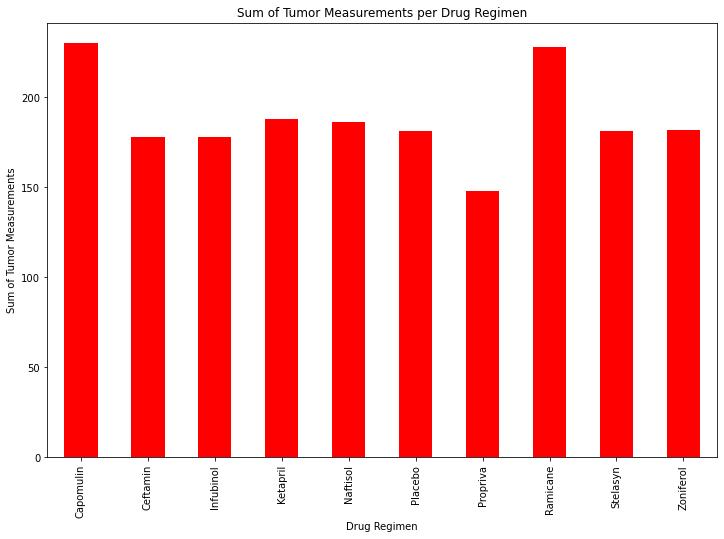

In [37]:
# Plotting Bar Chart
druggroupcount.plot(kind="bar", facecolor="red", figsize=(12,8))
plt.title("Sum of Tumor Measurements per Drug Regimen")
plt.ylabel("Sum of Tumor Measurements")

In [41]:
# Resetting index to set up for plotting with Matplotlib
druggroupcount = droppedID.groupby("Drug Regimen")["Tumor Volume (mm3)"].count().reset_index()
druggroupcount


,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,148
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


Text(0, 0.5, 'Sum of Tumor Measurements')

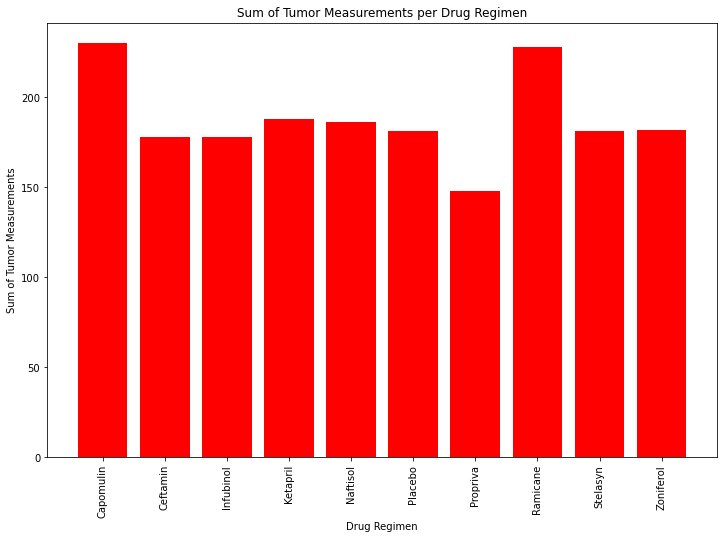

In [43]:
# Generate a bar plot showing the total number of measurements 
# taken on each drug regimen using pyplot.


x_axis = np.arange(len(druggroupcount))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(12,8))
plt.bar(x_axis, druggroupcount["Tumor Volume (mm3)"], color="r", align="center")
plt.xticks(tick_locations, druggroupcount["Drug Regimen"], rotation="vertical")
plt.title("Sum of Tumor Measurements per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Sum of Tumor Measurements")


In [61]:
# Generate a pie plot showing the distribution of female versus 
# male mice using pandas
gendercount = droppedID.groupby("Sex").nunique()
gendercount



,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,123,10,24,14,10,800,5
Male,125,10,24,14,10,834,5


<AxesSubplot:title={'center':'Gender Distribution'}>

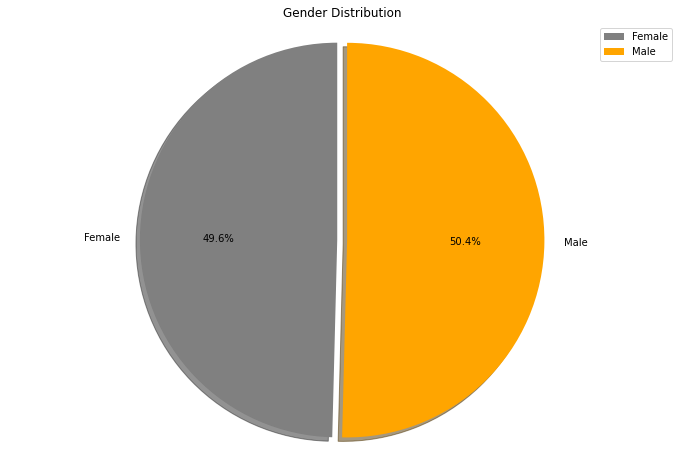

In [87]:
# Plotting Pie Chart with Pandas
explode = (0.05, 0)
colors = ["gray", "orange"]
piechart = gendercount.plot(kind="pie", y="Mouse ID", figsize=(12, 8), explode=explode, 
                            shadow=True, startangle=90, colors=colors, autopct="%1.1f%%")
plt.title("Gender Distribution")
piechart.set_ylabel("")
plt.axis("equal")
piechart


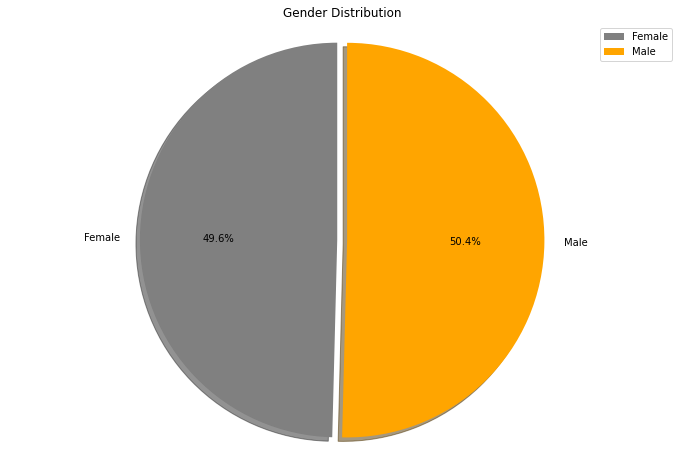

In [86]:
# Generate a pie plot showing the distribution of female versus 
# male mice using pyplot
gender = ["Female", "Male"]
count = [123, 125]
colors = ["gray", "orange"]
explode = (0.05, 0)
fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.pie(count, labels=gender, colors=colors, explode=explode, 
        shadow=True, startangle=90, autopct="%1.1f%%")
plt.legend()
plt.title("Gender Distribution")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four 
# of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor 
# volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are 
# any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse 
# across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a 
# mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse 
# weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
